In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib.dates import DateFormatter, date2num
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
timing_data_post_op = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/timing/results/timings_post-optimisation1.csv', names=['none','Time (S)','Carbon','Demand (MW)','Datetime'])
timing_data = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/timing/results/timing_results.csv',  names=['none','Time (S)','Carbon','Demand (MW)','Datetime'])
# timing_data_post_op = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/timing/results/timings_post-optimisation2.csv', names=['none','Time (S)','Carbon','Installed Capacity (MW)','Datetime'])

timing_data_post_op = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/timing/results/minimum_sized_country.csv', names=['none','Time (S)','Carbon','Installed Capacity (MW)','Datetime'])


# timing_data_post_op['Time (S)'] = pd.to_timedelta(timing_data_post_op['Time (S)'], unit="s")
# timing_data_post_op['Time (S)'] = pd.to_datetime(timing_data_post_op['Time (S)'])
# timing_data_post_op = timing_data_post_op[timing_data_post_op['Datetime']<'2019-02-01']

timing_data_post_op.sort_values(by='Installed Capacity (MW)')

,none,Time (S),Carbon,Installed Capacity (MW),Datetime
81,0,12.089937,40,22.5,2019-02-21_14-59-45
82,0,16.351854,40,22.5,2019-02-21_14-59-49
83,0,17.210220,40,22.5,2019-02-21_14-59-50
92,0,17.272563,40,29.5,2019-02-21_15-03-02
91,0,16.828076,40,29.5,2019-02-21_15-03-02
90,0,10.583347,40,29.5,2019-02-21_15-02-56
0,0,28.969732,40,54.0,2019-02-21_13-45-06
1,0,30.334695,40,54.0,2019-02-21_13-45-08
2,0,30.337902,40,54.0,2019-02-21_13-45-08
3,0,30.400035,40,54.0,2019-02-21_13-45-08


In [3]:
# timing_data['Capacity'] = pd.to_numeric(timing_data['Capacity'])

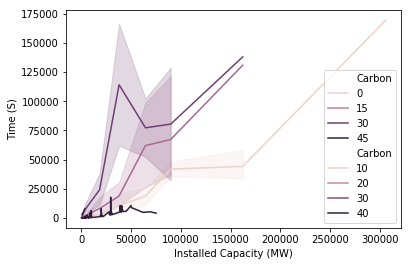

In [6]:
fig = plt.figure()
sns.lineplot(x="Demand (MW)", y='Time (S)', hue='Carbon', data = timing_data)
sns.lineplot(x="Installed Capacity (MW)", y='Time (S)', hue='Carbon', data = timing_data_post_op)

fig.savefig('timing_plot.png')

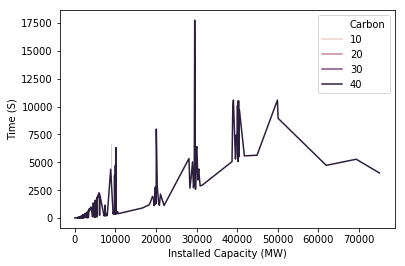

In [7]:
sns.lineplot(x="Installed Capacity (MW)", y='Time (S)', hue='Carbon', data = timing_data_post_op)
fig.savefig('timing_plot.png')

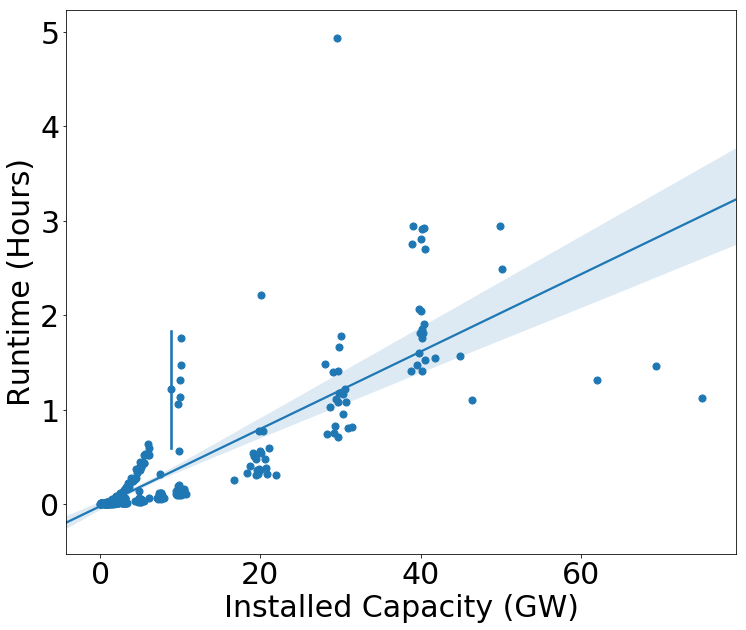

In [14]:
# fig, ax = plt.subplots()
# myFmt = DateFormatter("%H:%M:%S")
# ax.yaxis.set_major_formatter(myFmt)



# sns.lineplot(x="Installed Capacity (MW)", y='Time (S)', hue='Carbon', data = timing_data_post_op)
# plt.rcParams['figure.figsize'] = 12, 10

# plt.rcParams.update({'font.size': 20})

timing_data_post_op['Runtime (Hours)'] = timing_data_post_op['Time (S)']/(60*60)
timing_data_post_op['Installed Capacity (GW)'] = timing_data_post_op['Installed Capacity (MW)']/1000
# plt.gcf().autofmt_xdate()
fig = plt.figure()

plt.rcParams.update({'font.size': 30})
# sns.lineplot(x="Installed Capacity (MW)", y='Time (S)', hue="Carbon", data = timing_data_post_op)
sns.regplot(x="Installed Capacity (GW)", y='Runtime (Hours)',  data = timing_data_post_op, x_estimator=np.mean)

plt.rcParams['figure.figsize'] = 24, 20

fig.savefig('timing_plot.png')

# plt.rcParams.update({'font.size': 20})


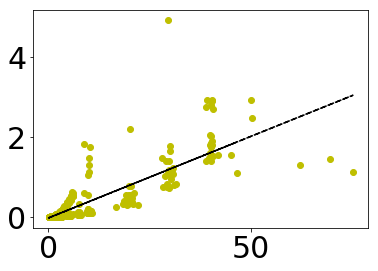

In [9]:

fit = np.polyfit(timing_data_post_op["Installed Capacity (GW)"],timing_data_post_op['Time (Hours)'],1)
fit_fn = np.poly1d(fit) 

plt.plot(timing_data_post_op["Installed Capacity (GW)"],timing_data_post_op['Time (Hours)'], 'yo', timing_data_post_op["Installed Capacity (GW)"], fit_fn(timing_data_post_op["Installed Capacity (GW)"]), '--k')

# sns.scatterplot(x="Installed Capacity (MW)", y='Time (S)', hue='Carbon',data = timing_data_post_op)


In [10]:
pfit = np.polyfit(timing_data_post_op['Installed Capacity (GW)'],timing_data_post_op['Time (Hours)'], deg=1)

p = np.poly1d(pfit)
p(20)

0.7949066006714688